# 1. Getting Familiar with notebook cells

You can add cells by clicking the + sign at the top. There are 4 different types of cells: Code, Markdown, Raw, and Heading. The above cell is a header cell, this is markdown.

In [1]:
print("This is a code cell")

This is a code cell


Create two new cells below. Make one a markdown where you fill in your name. Make the second cell a code cell and practice writing and executing something simple (print hello world?). Executing the cell with "shift+enter"

# 2. Loading LVG Data

Local Volume Galaxies (LVG) data is available through https://www.sao.ru/lv/lvgdb/introduction.php.
 Click on "tables", then "catalog of nearby galaxies". 
 If the download isn't starting, try allowing pop ups then download the table again.
 Save the table in the same place as this notebook.

Importing a package follows the form:\
import package_name\
if you'd like to rename the package, you can use:\
import package_name as new_name\
\
We'll be using numpy quite a bit. Import numpy below and rename it np

Loading in the data:

In [34]:
#for completely filled datasets, there are much cleaner ways of doing this.
#Our data has voids, so it's difficult to find something that neatly loads 
#in the data.

#To get around this, we'll read the file line by line as a string and convert
# the parts of the string that we want into their proper data types and save 
# them in lists. 

#Strings are handled as arrays in python. If we want to access the nth entry in 
#that string, we use s[n-1]. Every line of data has 118 characters, with the
#data we're interested in starting at index 102.

#Here is an example of extracting "data" from a string
s="abc def ghi kalsjdsalkj      123 567    velocity_type"
#We're interested in the data after the 25th index, so grab everything from there onward
#by using a semicolon after the index. Grabbing everything from the
#nth index to the mth index (exclusive) using list[n:m]. Leaving m blank grabs
#rest of the array.
s_last3 = s[25:]
print(s)
print(s_last3)
#Now split the data by whitespace, convert those to the datatypes we want,
#and save them.
s_last3_split = s_last3.split()
print(s_last3_split)
vel = float(s_last3_split[0])
dis = float(s_last3_split[1])
method = str(s_last3_split[2])
print(vel,dis,method)

abc def ghi kalsjdsalkj      123 567    velocity_type
    123 567    velocity_type
['123', '567', 'velocity_type']
123.0 567.0 velocity_type


In [35]:
#This is an entry from our dataset. Grab the velocity, distance, and distance
#method type following the method used above. These correspond to the last three entries
#Convert appropriately and print the values.
s="AGC102728          000021.4+310119   0.20 0.58 0.17  20.40  20.2         17.7*   18.70  21 10    Ir L  566 12.42 TRGB"

s_last3 = ??
#more work here
print(vel,dis,method)

In [ ]:
#Now, apply this to every line in the file, skipping the header. 
#Add those values to an array.
#Not every entry has a velocity measurement. If it doesn't, skip that line
#("continue" will move on to the next iteration in the for/enumerate loop).

#open the file in read mode ("r")
f = open('lvg_table1.dat', 'r')

#Iterate through the file lines with enumerate which is like a for loop
#but it also gives you an index i.

velocities, distances, distance_method = [],[],[]
for i, line in enumerate(f):
    if(i<??): continue #fill in ?? to skip the header
    
    # More work here. If there isn't a velocity,distance, or distance method then skip the line.
    
    velocities.append(vel)
    distances.append(dis)
    distance_method.append(method)

In [37]:
#Let's create a distance vs velocity plot. Import matplotlib and use the .scatter() function. 
#Fill in the appropriate x and y label w/ units
import matplotlib.pyplot as plt

In [3]:
plt.scatter(distances, velocities, s=2)
plt.ylabel("")
plt.xlabel("")

# 3. Calculating H_0

In [ ]:
#Next, let's try to calculate H_0 by finding the best linear fit to distance vs velocity. 
#For this, we can use polyfit which you can read about here: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

# Find H_0 using polyfit, filling in x,y, and deg. 
# What value of degree should we choose assuming  velocitiy is proportional to distance?

polynomial = np.polyfit(x,y,deg)


#Now that you have a fit, extract H_0 from that fit.
H_0 = ??

print(H_0)

How well does this agree with the actual value of H_0? Is there something about our data set that might throw this off?

Answer: ??

In [16]:
#Let's filter our data.
# The np.where() function is useful for returning indicies which meet a certain condition, 
# but they can only be applied to numpy arrays.

#Conversion from a python list to an numpy array follows:
python_list = [1,2,3,4,5]
numpy_array = np.array(python_list)

#Keeping values which are greater than 2.5, we can use np.where as:
indices = np.where(numpy_array>2.5)

#We then apply the indices to the numpy array to get our filtered array.
filtered_numpy_array = numpy_array[indices]
print(filtered_numpy_array)

[3 4 5]


In [17]:
#Following the filtering method above, 
#filter the data to focus on galaxies closer than 15mpc
#with velocities less than 1200 km/s
#You'll have to apply the indices to both arrays!
#Next, recalculate H_0. Does the value improve?

#Hint: for multiple conditions, you can one-line np.where with
# a = np.where((condition 1) & (condition 2)).

Does the value improve? Why does it improve?

Answer: 

In [2]:
#Plot the filtered data (scatter plot), with labels.
#also plot the fit, using the plt.plot(x,y) function
#and np.polyval to get the y-data from the fit. Make the fit line orange.
#Google the plt.plot function and the np.polyval function to learn how to
#use both of these things.

# 4. B_mag vs circular velocity

Next, we'll see how well the data fits the M_b vs v_circular relation given in the book (20.29). First, recycle your code above to read the file but this time you'll also want to read in: Apparent axial ratio, Integral B band magnitude, H I line with at 50% level from maximum, and Morphology type code.

I suggest opening the file and looking at the header to figure out where these things are stored. Rather than using the split method, you could instead just pull the indices for each value, where indices are given in the first column of the header, and cast them to floats/ints. We have voids for these columns too, so one (somewhat sketchy) way to get around this is with a try-except wrapper, with "continue" in the except condition so that we skip lines which don't have all the datapoints that we're interested in. See an example below.

Question: What is this relationship between M_b and v_circular called and what do we use it for in astronomy?

Answer: ??

In [9]:
test = "    "
#converting an empty string to a float produces an error.
print(float(test)) #error

ValueError: could not convert string to float: ''

In [2]:
#we can get around this by using a try-except.
for string in ["    ", "123154", " abcd"]:
    try:
        pr = float(string)
        print("succesfully converted '", string, "' to float")

    except:
        pr = "conversion error"
        print("can't convert '", string, "' to float")

    print(pr, "\n")

can't convert '      ' to float
conversion error 

succesfully converted ' 123154 ' to float
123154.0 

can't convert '  abcd ' to float
conversion error 



In [ ]:
f = open('lvg_table1.dat', 'r')

velocities, distances, distance_method = [],[],[]
ratios,b_mags, widths, gal_type = [],[],[],[]

for i, line in enumerate(f):
    if(i<??): continue #fill in ?? to skip the header
    
    # More work here. If we're missing a piece of data that we're interested in, skip the line
    
    
    
    ratios.append(s_ratio)
    b_mags.append(s_b)
    widths.append(s_width)
    gal_type.append(s_type)
    velocities.append(vel)
    distances.append(dis)
    distance_method.append(method)

In [12]:
#Next, convert the apparent b_magnitudes to absolute b_magnitudes, 
#equation 20.26 may be useful. Don't forget to convert from mpc to pc!
#np.log10() may be useful, which takes the element-wise log_10.
b_abs = ??

In [4]:
#Now convert the velocity widths into max circular velocities
#assuming cos(i) = b/a, where b/a is the "Apparent axial ratio" we've pulled from the data.
#np.sin() and np.arccos() (inverse cosine) may be useful. Again, these are element-wise functions and
#return a numpy array with the same numbers of elements as the input list.

v_max = ??

In [ ]:
#Make a scatter plot of v_max vs b_abs with appropriate labels and units.
#For the same values of vmax, plt.plot() vmax vs relation 20.29.
#np.sort(array) max be useful, which returns the sorted version of the array, preventing plt.plot() from being messy.

plt.scatter()
plt.xlabel()
plt.ylabel()
plt.plot(np.sort(v_max), f(np.sort(v_max))) #use the correct f

In [5]:
#Make the same plot, but this time only using irregular galaxies
# where a galaxy type of 10 corresponds to an irregular galaxy. np.where will be useful.




# 5.Euler Method, Orbits, Milky Way and Andromeda Collision

For simple dynamics we can usually find analytical solutions. For complicated problems, we can use the equations that govern the motion and numerically calculate the path objects take. There are several ways to do this, but we'll use the simplest: the Euler method.

For two objects (in 2D) with velocities (v0x, v0y) and (v1x,v1y), at positions (x0,y0) and (x1,y1), we can track their trajectories using the force of gravity and small timesteps. Iterating across time, for some small timestep dt, we'd update the position and velocity at each timestep as p = p_0+ v*dt, v = v_0 +a*dt. Apply this to the sun and the earth

In [8]:
#Note: You can change the set up below but I suggest working with numpy arrays, because you
#can easily add them element-wise as you would add vectors. ex:
l1 = np.array((1,2,3,4,5,6))
l2 = np.array((1,1,1,1,1,1))
print(l1+l2)

[2 3 4 5 6 7]


In [1]:
#fill in the calc_a (acceleration) function and parameters. Keep t_max at 5 years, though you're welcome to change dt.

AU = 1.496e+11 #meters
m_sol =2e30
m_earth= 6e24
G=6.26e-11
dt=1e4 #seconds
t_year=3.154e+7 #seconds per year
t_max=5*t_year
p0 = np.array((0.0,0.0))
p1 = np.array((AU,0.0))
v0 = np.array((0.0,0.0))
v1 = np.array((0.0,np.sqrt(G*2e30/AU)))
    
def calc_a(): 
    dist = get_dist(pa, pb)
    a = ??
    #hint: if you're using numpy arrays, a should also be a numpy array with
    #2 elements.
    return a 

def get_dist(pa,pb):
    distance = ??
    #I encourage the use of np.power, np.sum, and np.sqrt which allow you to
    #one-line this. You can Google their documentation.
    #You can use loops if you'd prefer though.
    return distance

p0s = []
p1s = []
for t in np.arange(0,t_max,dt): #iterate over time
    p0 += ?? #evolve the position for sun
    p1 += ?? #evolve the position for earth
    v0 += ?? #evolve the velocity for sun
    v1 += ?? #evolve the velocity for earth
    p0s.append(list(p0)) #appending lists rather than array, otherwise python append has issues.
    p1s.append(list(p1))

Plot your positions below. Is the orbit stable?

Asnwer:

In [51]:
#note, if you have a list the looks like:
l = [[0,0], [1,2],[3,4]]
#you can return an array of the first element of each sublist by first converting to 
#a numpy array and transposing the array with .T, then grabbing the first element.
print(np.array(l).T[0])

[0 1 3]


In [ ]:
p0sx = ??
p0sy = ??
p1sx = ??
p1sy = ??
plt.scatter(p0sx,p0sy,s=5)
plt.scatter(p1sx,p1sy,s=5)
plt.xlabel("")
plt.ylabel("")

If everything is working, you should get a figure like the one below

Text(0, 0.5, 'y(m)')

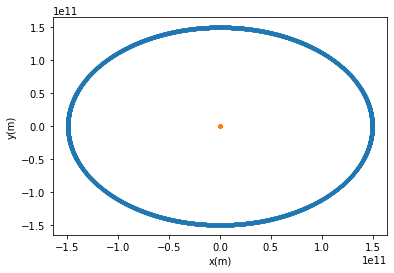

Now apply this to the Milky Way and Andromeda to calculate the collision time.
Loop across time and save the poisitions of each. Print the time that this collision occurs (distance < 1kpc), then calculate and plot the distance between andromeda and the milky way (it could be helpful to save time and distance by appending them to an array at each iteration. Assume the milky way is at p0 = (0,0) and andromeda is at p1=(distance,0). Be careful with units! (I suggest converting to SI units).

If you've picked a dt too small, you can cancel the run with the square interupt button at the top. Your code shouldn't take more than a few minutes (max) to run.

In [53]:
#You'll have to change t_max (on the order of 1e9 years) 
#and pick a more resonable dt. 


M_sol = 1.9e30
M_milkyway = 1.5e12*M_sol
M_andromeda = 1230e9*M_sol
v_milkyway = 0 #
v_andromeda = -117 #km/s. 
distance = 700 #kpc
#This is their relative velocity, start with MW stationary and andromeda moving at this speed as an apporimxation

dt=?? 
t_year=3.154e+7 #seconds per year
t_max=??*t_year

In [ ]:
print("Andromeda will collide with MW after", ??, " billion years")

In [ ]:
plt.plot(??,??)
plt.xlabel("")
plt.ylabel("")